In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('sample_data/hotel_bookings.csv', sep=",")
print(data.shape)

(119390, 32)


In [0]:
import os


In [5]:
os.getcwd()

'/content'

In [26]:
total_count = data.shape[0]
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка country. Тип данных object. Количество пустых значений 488, 0.41%.


In [10]:
print('Всего строк: {}'.format(total_count))

Всего строк: 119390


In [37]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((119390, 32), (119390, 28))

Удалим строки, содержащие null значения

In [38]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((119390, 32), (217, 32))

In [39]:
data_new_2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16


In [40]:
data_new_2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000
mean,0.078341,40.520737,2015.465438,38.198157,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,0.069124,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,63.793733,0.092166,0.198157
std,0.269329,61.748375,0.720053,12.890292,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,0.254252,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,38.823568,0.289929,0.546365
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,33.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000
50%,0.000000,27.000000,2015.000000,45.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000


Оценим плотность вероятности распределения данных

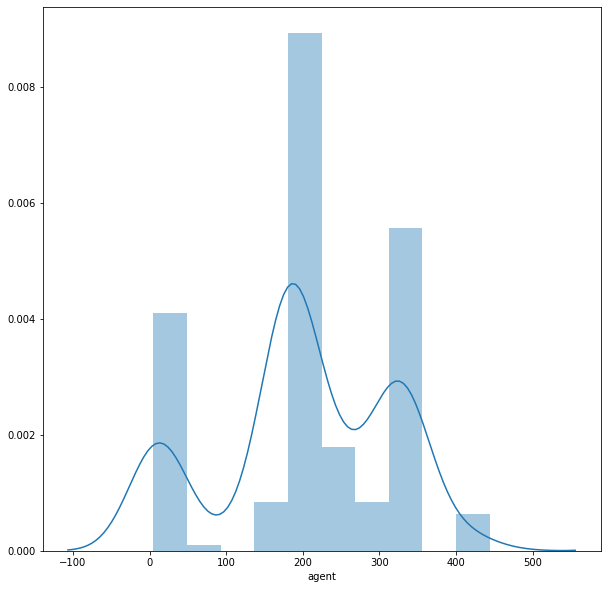

In [58]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data_new_2['agent'])

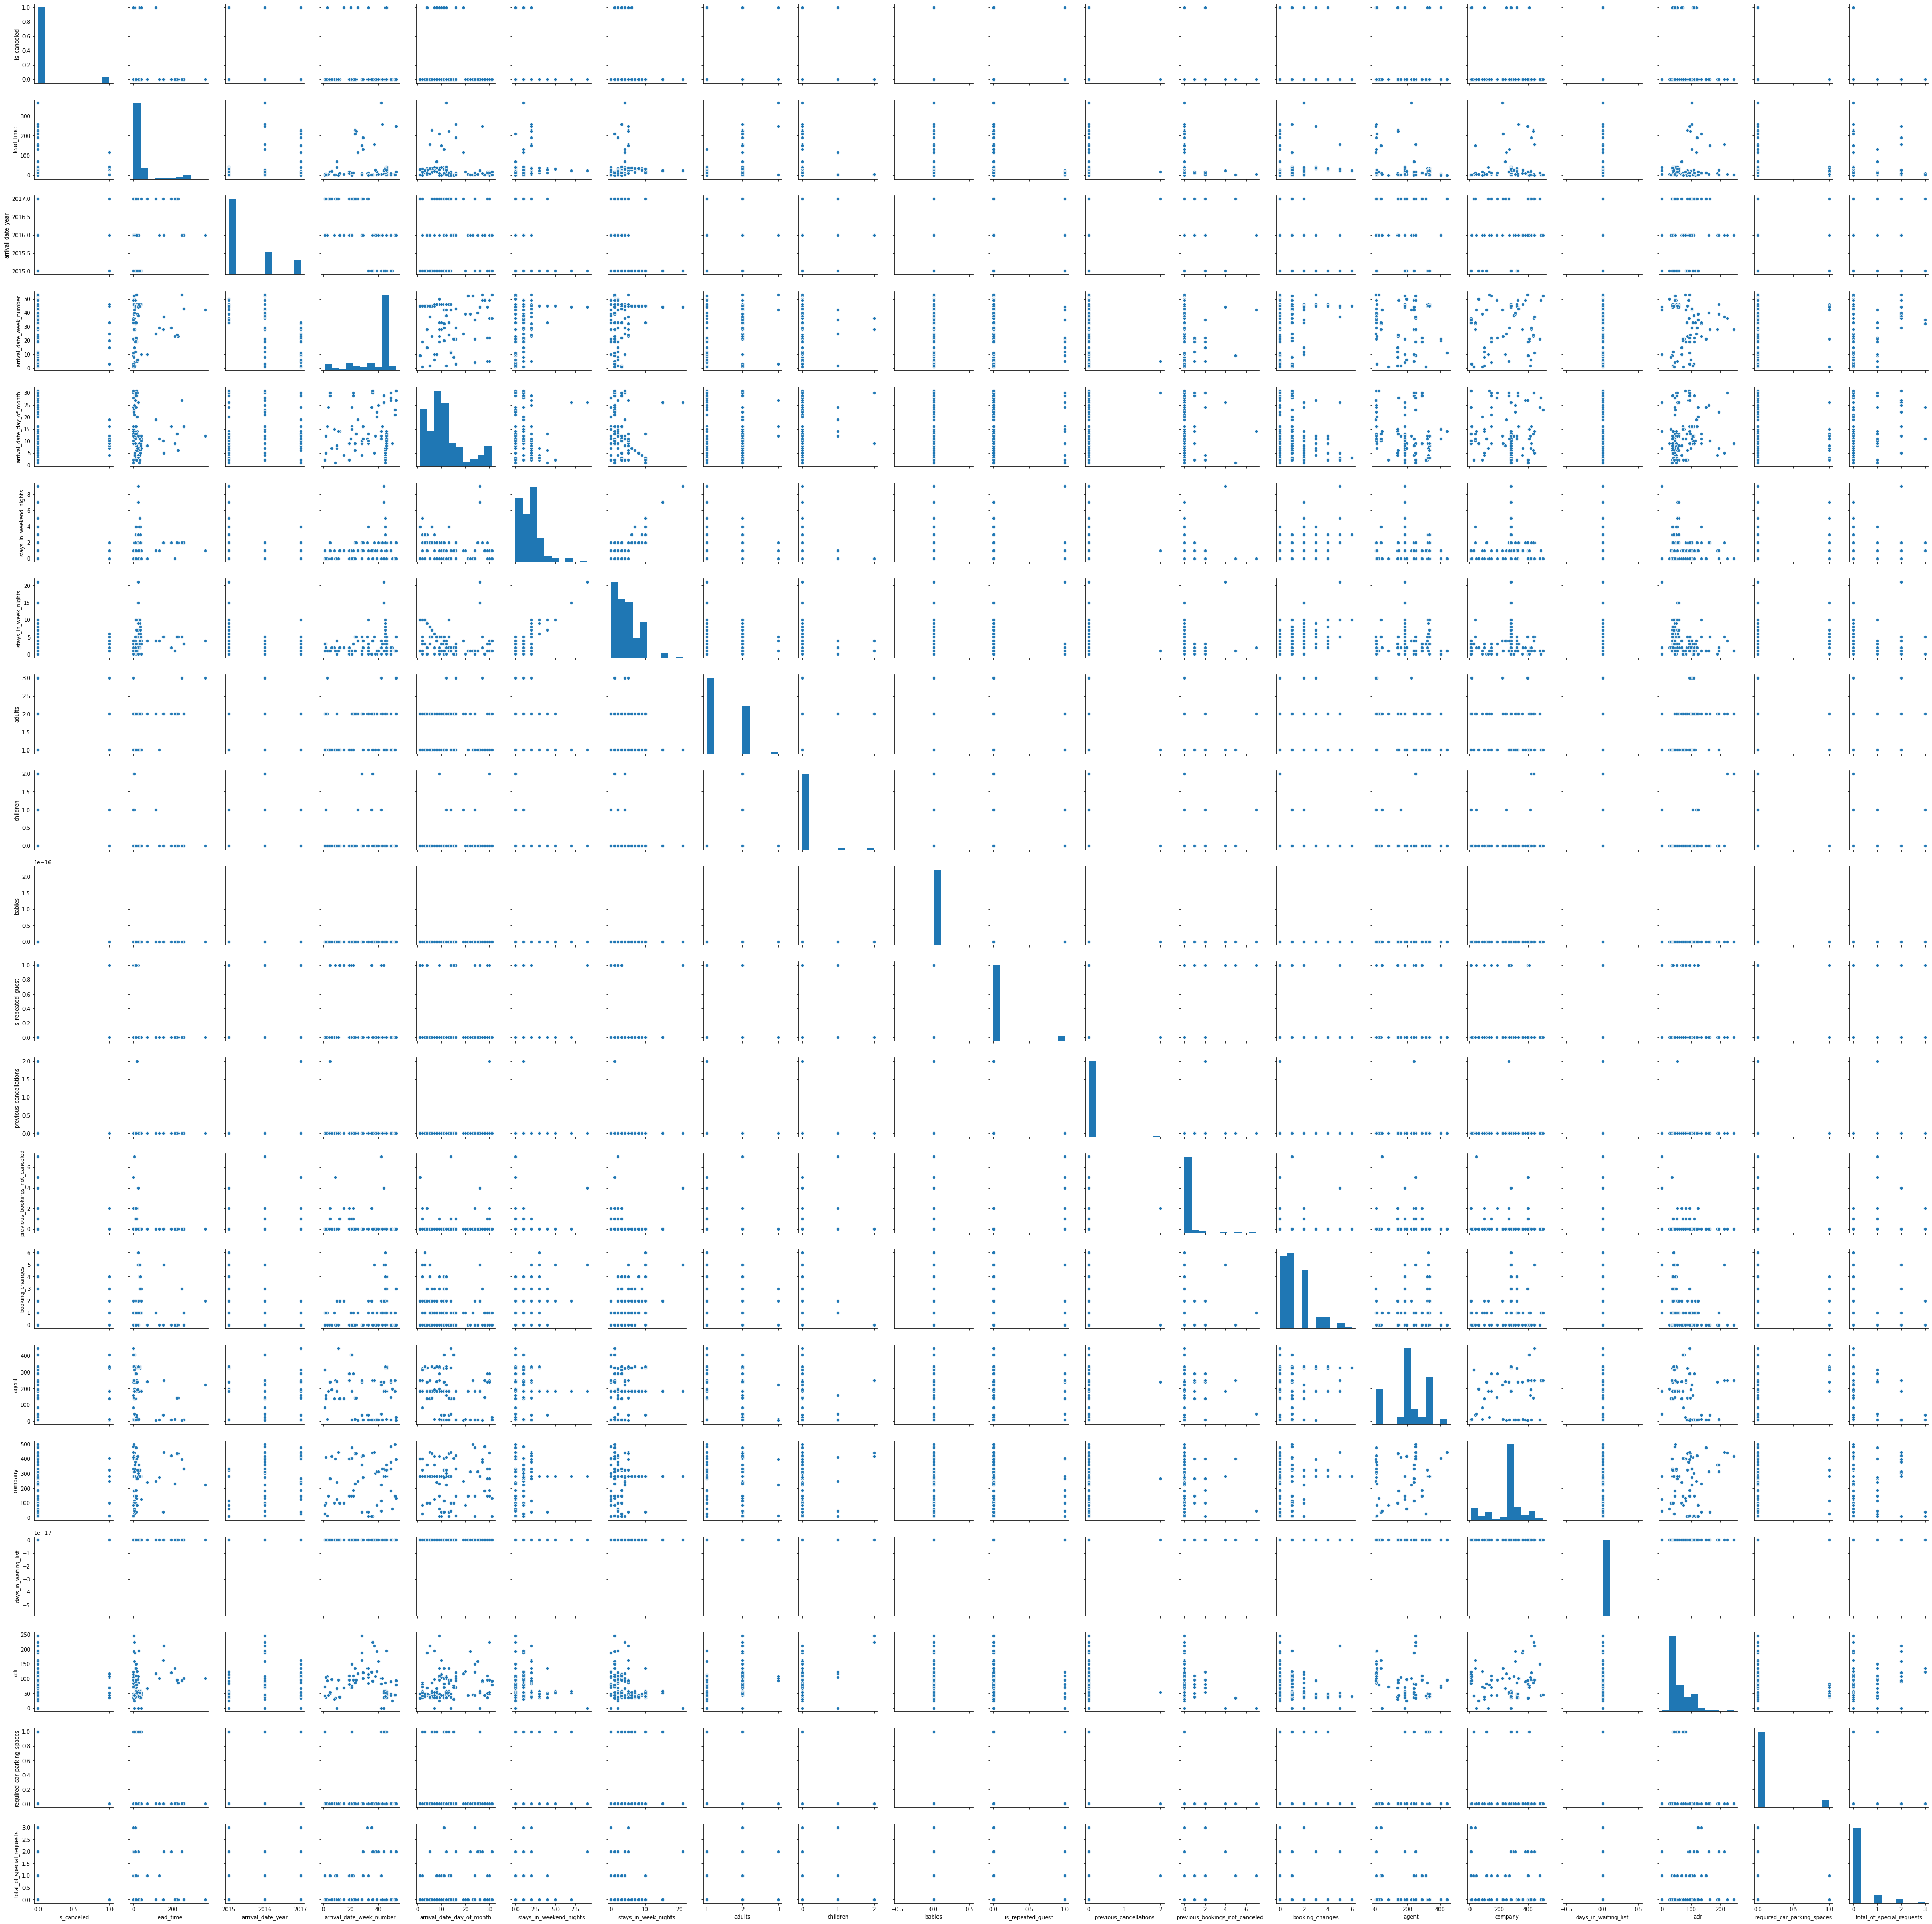

In [42]:
sns.pairplot(data_new_2)

Находим почти линейную зависимость между значениями двух колонок: arrival_date_week_number и adr

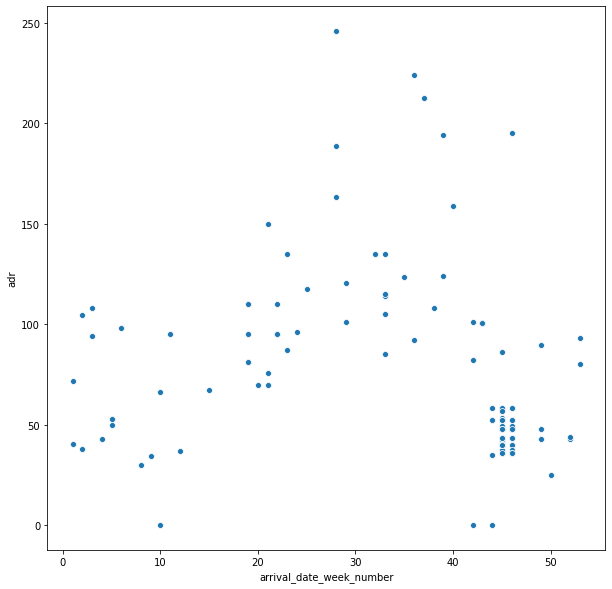

In [70]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='arrival_date_week_number', y='adr', data=data_new_2)

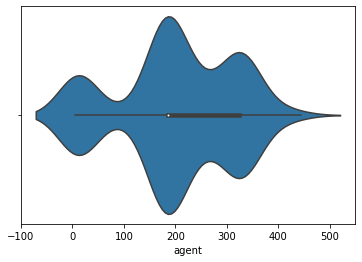

In [67]:
sns.violinplot(x=data_new_2['agent'])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.


**Корреляционный анализ**

Построим корреляционную матрицу

In [71]:
data_new_2.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,-0.039767,-0.069527,-0.003159,0.002215,-0.133996,-0.105148,-0.032118,0.027563,NaN,-0.011839,-0.019837,-0.012140,0.015698,-0.034460,-0.043769,NaN,-0.057069,-0.092895,-0.105983
lead_time,-0.039767,1.000000,0.232138,0.106130,0.068615,0.097390,-0.001527,0.345290,-0.061248,NaN,-0.136182,-0.024873,-0.102228,-0.052918,-0.369766,0.249593,NaN,0.240089,-0.089066,-0.001975
arrival_date_year,-0.069527,0.232138,1.000000,-0.768645,0.367765,-0.293971,-0.437521,0.105956,0.145736,NaN,0.278636,0.145344,0.206977,-0.482208,-0.175110,-0.037900,NaN,0.495254,-0.073376,0.399946
arrival_date_week_number,-0.003159,0.106130,-0.768645,1.000000,-0.147198,0.310536,0.424158,-0.022524,-0.113531,NaN,-0.348873,-0.175642,-0.208829,0.407445,0.068700,0.266991,NaN,-0.316452,0.001284,-0.233704
arrival_date_day_of_month,0.002215,0.068615,0.367765,-0.147198,1.000000,-0.148268,-0.322588,0.071086,0.158432,NaN,0.164811,0.172475,0.119611,-0.268911,-0.252158,-0.042122,NaN,0.275325,-0.038957,0.338099
stays_in_weekend_nights,-0.133996,0.097390,-0.293971,0.310536,-0.148268,1.000000,0.841841,-0.109940,-0.140356,NaN,-0.054922,-0.025897,-0.004918,0.341655,-0.038306,0.113399,NaN,-0.192612,0.092679,-0.013472
stays_in_week_nights,-0.105148,-0.001527,-0.437521,0.424158,-0.322588,0.841841,1.000000,-0.153215,-0.106640,NaN,-0.166413,-0.069705,-0.045755,0.498610,0.169143,0.113393,NaN,-0.352100,0.087073,-0.138681
adults,-0.032118,0.345290,0.105956,-0.022524,0.071086,-0.109940,-0.153215,1.000000,0.180337,NaN,-0.075300,-0.053748,-0.051119,-0.102568,-0.292686,-0.097755,NaN,0.413196,-0.098274,0.071058
children,0.027563,-0.061248,0.145736,-0.113531,0.158432,-0.140356,-0.106640,0.180337,1.000000,NaN,0.113186,-0.010801,0.216683,-0.083999,-0.071879,0.064336,NaN,0.397079,-0.050577,0.087897
babies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Также построим матрицу корреляций по Пирсону   
Так как значений довольно много, выберем матрицу без подписания числовых значений

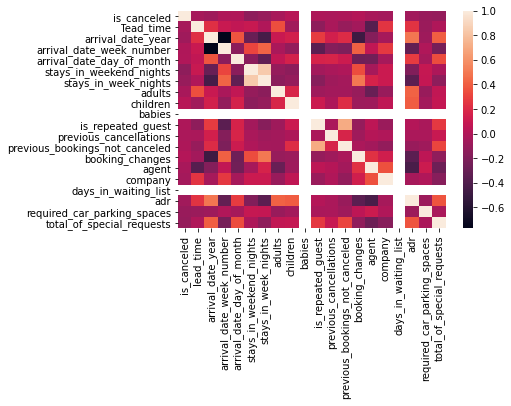

In [78]:
sns.heatmap(data_new_2.corr())

В примере тепловая карта помогает определить сильную корреляцию, например, между признаками *stays_in_week_nights* и *stays_in_weekeend_nights*, следовательно только один из этих признаков можно включать в модель.